Authored by Arqam Patel. 

CC BY 4.0 License

# Logistic Regression for binary classification

In this notebook, we'll explore three ways of doing logistic regression for binary classification with gradient descent:
* Computing the gradient function manually
* Abstracting gradient computation using Torch autograd
* Using all Torch neural network abstractions, including optimisers

The aim is to realise how deep learning frameworks make our life significantly easier- imagine having to calculate gradients manually for much more complex networks.

In [1]:
import torch

In [2]:
# data preprocessing
import sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

from sklearn.model_selection import train_test_split
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.1, random_state = 42)

from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)


# X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
y_train = torch.unsqueeze(y_train, 1)
# X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)
y_test = torch.unsqueeze(y_test, 1)

The sigmoid function transforms real values into the target range from 0 to 1. It is thus useful for converting linear regression values into "probability" values that a certain datapoint belongs to a certain class.
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
$$ \frac{d\sigma(x)}{dx} = \sigma(x) (1- \sigma(x)) $$



$\hat{y}_i$ represent predicted probability that the given sample belongs to class 1.
$$\hat{y}_i = \sigma(x_i'\beta)$$

$$\frac{d\hat{y}_i}{d\beta} = X'(\sigma'(x_i'\beta))$$

Cross entropy loss L is given by:
$$L = - \sum (y_i log(\hat{y}_i) + (1-y_i)log(1-\hat{y}_i))$$

# Gradient computation for logistic regression

Given an input vector $ X $ (with each row as a data point and each column as a feature) and a weight vector $ \beta $, the logistic regression model predicts the probability $ \hat{y} $ as:

$ \hat{y} = \sigma(X\beta) $

where $ \sigma(z) = \frac{1}{1 + e^{-z}} $ is the sigmoid function.

### Derivative of the Sigmoid Function

The derivative of the sigmoid function, $ \sigma'(z) $, is:

$ \sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)) $

### Loss Function

The binary cross-entropy loss is:

$ L = -\sum [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y_i})] $

### Gradient of the Loss Function with Respect to Predictions

The gradient of the loss function with respect to the predictions $ \hat{y} $ is:

$ \frac{\partial L}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} $

### Chain Rule for the Complete Gradient

To find the gradient with respect to the weights $ \beta $, we apply the chain rule. The complete gradient of the loss with respect to the weights is the product of the gradient of the loss with respect to the predictions and the derivative of the predictions with respect to the weights.

Since $ \hat{y} = \sigma(X\beta) $, the derivative of $ \hat{y} $ with respect to $ \beta $ is $ X^T \cdot \sigma'(X\beta) $.

Combining these, the gradient of the loss with respect to the weights is:

$ \nabla_\beta L = X^T \left( \frac{\partial L}{\partial \hat{y}} \cdot \sigma'(X\beta) \right) $

Plugging in the expressions for $ \frac{\partial L}{\partial \hat{y}} $ and $ \sigma'(z) $, we get:

$ \nabla_\beta L = X^T \left( \left( -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} \right) \cdot \left( \hat{y} \cdot (1 - \hat{y}) \right) \right) $

Simplifying further:

$ \nabla_\beta L =  X^T (\hat{y} - y) $


# Logistic Regression from scratch

In [3]:
class ScratchLR():
    def __init__(self, p, lr = 0.01):
        # initialise parameters as px1 column vector of zeros
        self.params = torch.zeros((p,1))
        self.lr = lr

    def forward(self, data):
        # data: n x p-1
        n = data.shape[0]
        X = torch.cat((data, torch.ones(n, 1)), 1)
        return torch.sigmoid(X @ self.params)
    
    def loss(self, data, true):
        n = data.shape[0]
        pred = self.forward(data)
        # binary cross entropy loss
        loss = 1/n*torch.sum(-(true* torch.log(pred) + (1-true)*torch.log(1-pred)))
        return loss
             
    def grad(self, data, true):
        n = data.shape[0]
        pred = self.forward(data)
        n = data.shape[0]
        X = torch.cat((data, torch.ones(n, 1)), 1)
        return 1/n* X.t()@(pred - true) 
        
    def step(self, data, true):
        self.params = self.params - self.lr * self.grad(data, true)
        
    def train(self, data, true, n_steps):
        logs = []
        for i in range(n_steps):
            print(f"Step no {i}")
            self.step(data, true)
            loss = self.loss(data, true)
            print(f"Loss {loss.item()}")
            logs.append(loss.item())
            
        return logs

In [32]:
logistic1 = ScratchLR(31, 0.01)

In [5]:
logs = logistic1.train(X_train_scaled, y_train, 1000)

Step no 0
Loss 0.6733601093292236
Step no 1
Loss 0.654815673828125
Step no 2
Loss 0.6374273300170898
Step no 3
Loss 0.6211110353469849
Step no 4
Loss 0.6057862639427185
Step no 5
Loss 0.5913771986961365
Step no 6
Loss 0.5778127908706665
Step no 7
Loss 0.5650271773338318
Step no 8
Loss 0.5529598593711853
Step no 9
Loss 0.5415550470352173
Step no 10
Loss 0.5307618975639343
Step no 11
Loss 0.5205340385437012
Step no 12
Loss 0.5108290910720825
Step no 13
Loss 0.5016086101531982
Step no 14
Loss 0.49283748865127563
Step no 15
Loss 0.48448359966278076
Step no 16
Loss 0.47651779651641846
Step no 17
Loss 0.4689134657382965
Step no 18
Loss 0.46164631843566895
Step no 19
Loss 0.4546939432621002
Step no 20
Loss 0.4480360746383667
Step no 21
Loss 0.44165390729904175
Step no 22
Loss 0.43553024530410767
Step no 23
Loss 0.42964935302734375
Step no 24
Loss 0.4239965081214905
Step no 25
Loss 0.4185584485530853
Step no 26
Loss 0.41332265734672546
Step no 27
Loss 0.4082776606082916
Step no 28
Loss 0.40341

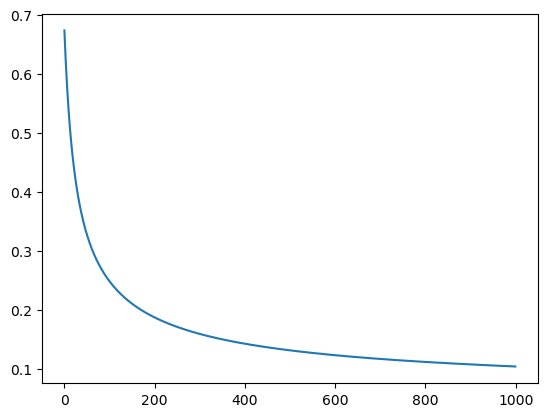

In [7]:
import matplotlib.pyplot as plt
# Plot training loss curve
plt.plot(logs)
plt.show()

In [8]:
train_preds = logistic1.forward(X_train_scaled)
print(torch.mean((1*(train_preds > 0.5) == y_train)*1.))

tensor(0.9785)


In [9]:
preds = logistic1.forward(X_test_scaled)
torch.mean((1*(preds > 0.5) == y_test)*1.)

tensor(0.9825)

# Logistic Regression with Autograd

In [10]:
from torch import nn

In [11]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))


In [12]:
# we use Torch autograd to make our task simpler, by removing the grad method and using loss.backward()

class AutogradLR(nn.Module):
    def __init__(self, p, lr = 0.01):
        # initialise parameters as px1 column vector of zeros
        super().__init__()
        self.params = torch.nn.Parameter(torch.zeros(p, 1))
        self.lr = lr

    def forward(self, data):
        # data: n x p-1
        n = data.shape[0]
        X = torch.cat((data, torch.ones(n, 1)), 1)
        return sigmoid(X @ self.params)
    
    def loss(self, data, true):
        n = data.shape[0]
        pred = self.forward(data)
        # binary cross entropy loss
        loss = 1/n*torch.sum(-(true* torch.log(pred) + (1-true)*torch.log(1-pred)))
        return loss
        
    def step(self, data, true):
        loss = self.loss(data, true)
        loss.backward() # magically computes the gradients of the loss wrt each parameter
        
        with torch.no_grad():
            # gradient descent step
            self.params -= self.lr *self.params.grad
            # clear gradients for next step
            self.params.grad.zero_()
            
        return loss
        
    def train(self, data, true, n_steps):
        logs = []
        for i in range(n_steps):
            print(f"Step no {i}")
            loss = self.step(data, true)
            print(f"Loss {loss.item()}")
            logs.append(loss.item())
            
        return logs

In [13]:
logistic2 = AutogradLR(31, 0.01)
logistic2.loss(X_train_scaled, y_train)

tensor(0.6931, grad_fn=<MulBackward0>)

In [14]:
logs = logistic2.train(X_train_scaled, y_train, 1000)

Step no 0
Loss 0.6931472420692444
Step no 1
Loss 0.6733601093292236
Step no 2
Loss 0.654815673828125
Step no 3
Loss 0.6374273300170898
Step no 4
Loss 0.6211110353469849
Step no 5
Loss 0.6057862639427185
Step no 6
Loss 0.5913771986961365
Step no 7
Loss 0.5778127908706665
Step no 8
Loss 0.5650271773338318
Step no 9
Loss 0.5529598593711853
Step no 10
Loss 0.5415550470352173
Step no 11
Loss 0.5307618379592896
Step no 12
Loss 0.5205340385437012
Step no 13
Loss 0.5108290910720825
Step no 14
Loss 0.5016086101531982
Step no 15
Loss 0.49283748865127563
Step no 16
Loss 0.4844835698604584
Step no 17
Loss 0.47651779651641846
Step no 18
Loss 0.4689134657382965
Step no 19
Loss 0.46164631843566895
Step no 20
Loss 0.4546939432621002
Step no 21
Loss 0.4480360746383667
Step no 22
Loss 0.44165390729904175
Step no 23
Loss 0.43553024530410767
Step no 24
Loss 0.42964932322502136
Step no 25
Loss 0.4239965081214905
Step no 26
Loss 0.4185584485530853
Step no 27
Loss 0.41332265734672546
Step no 28
Loss 0.408277

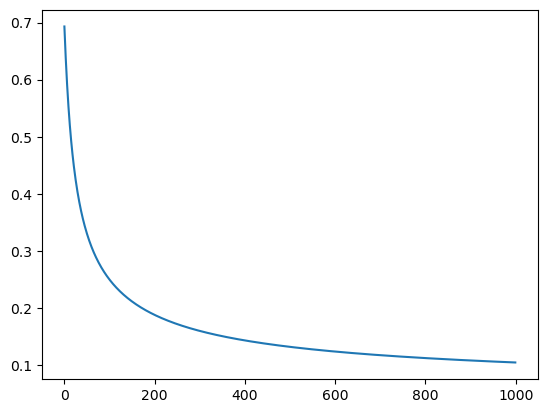

In [15]:
import matplotlib.pyplot as plt
plt.plot(logs)
plt.show()

In [16]:
train_preds = logistic(X_train_scaled)
print(torch.mean((1*(train_preds > 0.5) == y_train)*1.))

tensor(0.9785)


In [17]:
preds = logistic(X_test_scaled)
torch.mean((1*(preds > 0.5) == y_test)*1.)

tensor(0.9825)

## Coding Logistic Regression as a (very simple) Neural Network in Pytorch

In [18]:
class NeuralLR(nn.Module):
    def __init__(self, p):
        super().__init__()
        self.lin1 = nn.Linear(p, 1) # Linear layer means vanilla fully connected layer (with both weights and biases)
        # p represents no. of input features and only one output since we're doing binary classification
    
    def forward(self, x):
        return torch.sigmoid(self.lin1(x))


In [19]:
# equivalently, we can use the sequential API to define the layers if we have a straightforward flow

class NeuralLR(nn.Sequential):
    def __init__(self, p):
        super().__init__(
            nn.Linear(p,1),
            nn.Sigmoid()
            )

In [20]:
# we generally define the train function separately from the model class

def train(model, X_train, y_train, optimiser, loss_fn, n_steps):
    logs = []
    for i in range(n_steps):
        optimiser.zero_grad # zero the gradients before each step so that they dont accumulate
        preds = model(X_train) # forward pass
        loss = loss_fn(preds, y_train) # loss computation
        loss.backward() # automatically computes the gradients of loss wrt params
        optimiser.step() # updates the parameters acc to the optimiser hyperparams and gradient

        print(f"Step {i}")
        print(f"Loss: {loss.item()}")
        
        logs.append(loss.item())
        
    return logs

In [21]:
from torch.nn.functional import binary_cross_entropy

model = NeuralLR(30)
loss_fn = binary_cross_entropy
optimiser = torch.optim.SGD(model.parameters(), lr = 1e-5)

In [22]:
logs = train(model, X_train_scaled, y_train, optimiser, loss_fn, 1000)

Step 0
Loss: 0.5475033521652222
Step 1
Loss: 0.5474904775619507
Step 2
Loss: 0.5474647283554077
Step 3
Loss: 0.5474261045455933
Step 4
Loss: 0.5473746061325073
Step 5
Loss: 0.5473102331161499
Step 6
Loss: 0.547232985496521
Step 7
Loss: 0.5471428632736206
Step 8
Loss: 0.5470399856567383
Step 9
Loss: 0.5469242930412292
Step 10
Loss: 0.5467957258224487
Step 11
Loss: 0.5466544032096863
Step 12
Loss: 0.5465002655982971
Step 13
Loss: 0.546333372592926
Step 14
Loss: 0.5461537837982178
Step 15
Loss: 0.5459614396095276
Step 16
Loss: 0.5457563996315002
Step 17
Loss: 0.5455386638641357
Step 18
Loss: 0.5453082323074341
Step 19
Loss: 0.5450652837753296
Step 20
Loss: 0.5448096990585327
Step 21
Loss: 0.5445415377616882
Step 22
Loss: 0.5442608594894409
Step 23
Loss: 0.5439676642417908
Step 24
Loss: 0.5436620116233826
Step 25
Loss: 0.5433439016342163
Step 26
Loss: 0.5430133938789368
Step 27
Loss: 0.5426706075668335
Step 28
Loss: 0.5423154234886169
Step 29
Loss: 0.5419479608535767
Step 30
Loss: 0.541568

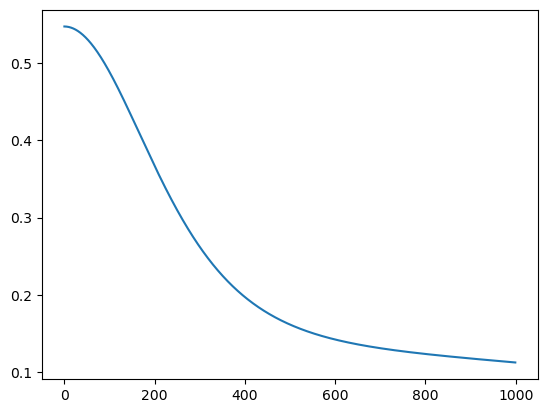

In [23]:

plt.plot(logs)
plt.show()

In [24]:
# train accuracy
train_preds = model(X_train_scaled)
print(torch.mean((1*(train_preds > 0.5) == y_train)*1.)) # ~ 96.7%

tensor(0.9609)


In [25]:
# test accuracy
preds = model(X_test_scaled)
torch.mean((1*(preds > 0.5) == y_test)*1.) # ~ 96.5%

tensor(0.9474)